In [1]:
import os
import sys
import argparse
import pickle
import h5py
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from dataset.utils import load_coco, load_image
from models.topic_model import load_topic_model

In [6]:
def load_data(data_type, data_dir):
    # Path for the cache-file.
    feature_cache_path = os.path.join(
        data_dir, 'features_{}.pkl'.format(data_type)
    )
    topics_cache_path = os.path.join(
        data_dir, 'categories_{}.pkl'.format(data_type)
    )
    images_path = os.path.join(
        data_dir, 'images_{}.pkl'.format(data_type)
    )

    with open(topics_cache_path, mode='rb') as file:
        topics = pickle.load(file)
    with open(feature_cache_path, mode='rb') as file:
        feature_obj = pickle.load(file)
    with open(images_path, mode='rb') as file:
        images = pickle.load(file)

    print('{} data loaded from cache-file.'.format(data_type))
    return feature_obj, topics, images

In [9]:
# Load pre-processed data
features_val, topics_val, images = load_data(
    'test', 'dataset/processed_data'
)
topics_val = np.array(topics_val)
print('\nFeatures shape:', features_val_arr.shape)
print('Topics shape:', topics_val.shape)

test data loaded from cache-file.

Features shape: (5000, 4096)
Topics shape: (5000, 80)


In [10]:
# Load mapping
with open('dataset/coco_raw.pickle', 'rb') as file:
    coco_raw = pickle.load(file)
id_category = coco_raw['id_category']

In [11]:
# Create model
model = load_topic_model(features_val_arr.shape[1:], topics_val.shape[1], 'weights/topic-weights-39-0.09.hdf5')
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Weights loaded.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_input (InputLayer)   (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 80)                327760    
Total params: 327,760
Trainable params: 327,760
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
def get_predictions(model, feature, image, label, id_category):
    image_batch = np.expand_dims(feature, axis=0)
    predictions = model.predict(image_batch)
    
    prediction_labels = []
    for index, prediction_probability in enumerate(predictions[0]):
        if prediction_probability > 0.4:
            prediction_labels.append(id_category[index])
    
    true_labels = []
    for index, value in enumerate(label):
        if value == 1:
            true_labels.append(id_category[index])
    
    print('True labels:', true_labels)
    print('Predictions:', prediction_labels)
    
    print('Image:')
    img_arr = load_image('dataset/' + image)
    plt.imshow(img_arr)
    plt.show()

True labels: ['cup', 'bowl', 'broccoli', 'carrot', 'dining table']
Predictions: ['bowl', 'broccoli', 'dining table']
Image:


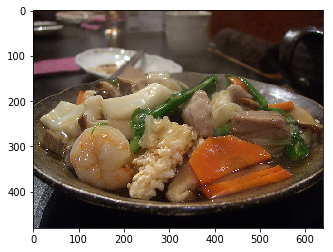

In [25]:
idx = 3789
get_predictions(model, features_val_arr[idx], images[idx], topics_val[idx], id_category)